# Анализ рынка видеоигр

<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [Описание проекта](#1.)
* [Шаг 1. Открыть и подготовить данные](#2.)
     - [Вывод по первому шагу](#2.1.)
*  [Шаг 2. Проведём исследовательский анализ данных](#3.)
     - [Вывод по второму шагу](#3.1.)
* [Шаг 3. Составим портрет пользователя каждого региона](#4.)
     - [Вывод по третьему шагу](#4.1.)
*  [Шаг 4. Проверим гипотезы](#5.)
     - [Вывод по четвертому шагу](#5.1.)     
* [Шаг 5. Общий вывод](#6.)
     - [Реккомендации бизнесу](#6.1.) 


# О проекте <a name="1."></a><br/>



Задача: найти из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы  и  выявить определяющие успешность игры закономерности, чтобы  сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


[<font size="2">(к содержанию)</font>](#to_content.)

# Описание данных <a name="0."></a><br/>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Что предстоит сделать?


<strong><font size=3>Шаг 1. Открыть и подготовить данные</font></strong><br/>

* Ознакомиться с данными.
* Подготовить таблицу для дальнейшего исследования, а именно:

  1. Найти и понять природу пропусков. При необходимости, заменить.
  2. Преобразовать данные к нужным типам для дальнейшей работы с ними.
  3. Посчитать суммарные продажи во всех регионах

<strong><font size=3> Шаг 2. Провести исследовательский анализ данных</font></strong><br/>

* Определить, сколько игр выпускалось в разные годы и важны ли данные за все периоды.
* Посмотреть, как менялись продажи по платформам. 
* Определить какие платформы лидируют по продажам.
* Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Соотнести выводы с продажами игр на других платформах.
* Узнать какой жанр наиболее прибыльный.

<strong><font size=3> Шаг 3. Составить портрет пользователя каждого региона </font></strong><br/>

* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Узнать влияет ли рейтинг ESRB на продажи в отдельном регионе

<strong><font size=3> Шаг 4. Проверить гипотезы</font></strong><br/>

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.* 

<strong><font size=3> Шаг 5. Общий вывод. Рекомендации бизнесу</font></strong><br/>

# Шаг 1. Открыть и подготовить данные <a name="2."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd 
import numpy as np
import warnings                   
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('***')

Ознакомимся с таблицей и посмотрим на данные.

In [3]:
df.head(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16690,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.0,80.0,7.6,M
16693,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16694,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Для дальнейшего удобства сразу приведём название столбцов к нижнему регистру.

In [5]:
def to_columns(name):
    name = name.lower()
    return name

In [6]:
df = df.rename(columns = to_columns)

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Продолжим знакомиться дальше с нашей таблицей.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что здесь представлены игры начиная с 1980 года. А так же, что в столбце critic_score оценки выставлены по 100-бальной шкале.

In [11]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пустые значения в основном лежат вокруг рейтинга, что можно объяснить тем, что игра непопулярна, выпущена раньше специальных платформ. В столбце name и genre по 2 пропущенных значения. Посмотрим на них.

In [12]:
df[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ну да. Это одни и те же строки. Как видим, что игра выпущена на платформе, которая уже неактуальна, а так же очень мало информации о данной строке. Так что от неё можно избавиться. Теперь взглянем, что за значения лежат в столбце rating.

In [13]:
df.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Теперь глянем на все оценки в столбце user_score

In [14]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<strong><font size=3> После ознакомления с таблицей можно сделать вывод, что: </font></strong><br/>

1. Нам следует привести в порядок столбец user_score, т.к. тип данных object, хотя там содержатся числовые значения об оценках. Как видим, что в конце таблицы нам попадается аббревиатура "tbd", что означает: "подлежит уточнению". Собственно, из-за этой аббревиатуры у нас и поехал тип данных. В следующем шаге избавимся от этой аббревиатуры, чтобы привести столбец к нудному типу данных для дальнейшего исследования. 
2. Так же видим, что в столбце year_of_release тип данных не целочисленный, хотя речь идёт о годах. Исправим. Так же там большое колличество пропущенных значений. Как восстановить их решим в дальнейшем.
3. В столбцах rating, user_score, critic_score пропущенные значения, что говорит о том, что скорее всего игры непопулярные и не получили оценки и присвоения какого - либо рейтинга или же выпуск игр состоялся до появления каких-либо платформ/организаций оценивающие игры. В общем, восстановить значения эти не сможем. 
4. в столбце name и genre пропущенные значения. Ознакомились с ними отдельно и пришли к выводу, что данную строку можно удалить, т.к. никакой информации она не несёт и восстановить так же ничего не выйдет. 

<strong><font size=3>  Что говорят нам данные? </font></strong><br/>

в столбце rating лежат оценки согласно организации ESRB:

   * E - для всех возрастов (все)
   * T - для лиц от 13 лет и старше (младший подросток)
   * M - от 17 лет и старше (старший подросток)
   * E10+ - от 10 лет и старше (ребёнок)
   * EC - для всех возрастов (все), тоже самое, что и Е
   * RP - оценка ещё не присвоена
   * K-A - для всех возрастов (все), тоже самое, что и Е
   * AO - для лиц старше 18 лет (взрослый)
   
в стобце user_score оценки распределены по 10-ти бальной шкале

в столбце critic_score оценки распределены по 100-бальной шкале

<strong><font size=3> Присупим к подготовке данных к анализу.</font></strong><br/>

Обработаем нулевые значения. Уберём сразу те самые 2 сроки с пропусками в жанре и наименовании.

In [15]:
df = df[df['name'].isnull() == False]

Отлично. Теперь приступим к столбцам с данными об оценке. Как мы помним, что в столбце user_score нам нужен числовой тип данных. Т.к. повлиять на оценки мы никак не можем, то просто оставим их пустыми, а tbd заменим на NaN и приведём к числовуму типу нашу колонку. 

In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
df['user_score'] = df['user_score'].astype(float)

Теперь перейдём к годам.

In [18]:
df[df['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Тут мы сделать, увы, ничего сможем. Точнее, сможем, но есть два пути:
1. это пришлось бы гуглить каждое наименование и вносить вручную правки о дате выпуска. Как правило, у заказчика вряд ли есть столько времени.
2. Посмотреть в данных те же игры на других платформах и исходя из них заменить значения, но как мы помним, что разработчики часто выпускают игры в разное время для разных платформ. Будь то, эксклюзив для платформы или по причинам сложности разработки. 

Так как объём данных небольшой, но нам в дальнейшем будет важно знать год выпуска, то примем решение убрать данные пропуски из нашей таблицы.

In [19]:
df = df.dropna(subset=['year_of_release'])

In [20]:
df['year_of_release'].isnull().sum()

0

In [21]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Ну вот. Теперь у нас таблица выглядит более-менее читабельной. Теперь добавим столбец с общей выручкой данной игры.

In [23]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [24]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Вывод по первому шагу. <a name="2.1."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

1. Ознакомились с данными.
2. Привели типы данных к нужным нам для дальнейшего исследования.
3. Добавили столбец с общей выручкой каждой игры.

<strong><font size=3>Приступим к следующему шагу</font></strong><br/>


# Шаг 2. Проведём исследовательский анализ данных <a name="3."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

Для начала посмотрим сколько игр выпускалось в разные годы.

In [25]:
df.groupby('year_of_release').agg({'name':'count'}).style.bar()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Видим, что по нашим данным пик выпуска игр пришёлся на 2008 и 2009 года, а потом постепенно происходит снижение колличества игр и так же резкое снижение выпускаемых игр, начиная с 2012 года, что можно связать с:

1. Падает колличество платформ на которые выпускаются игры. Например, на замену многим портативным приставкам пришёл мобильный гейминг.
2. Игры становятся более сложными в разработке и соответственно у студии уходит больше времени на выпуск игр. 


Теперь посмотрим на то, какие платформы принесли больше всего выручки за всё время

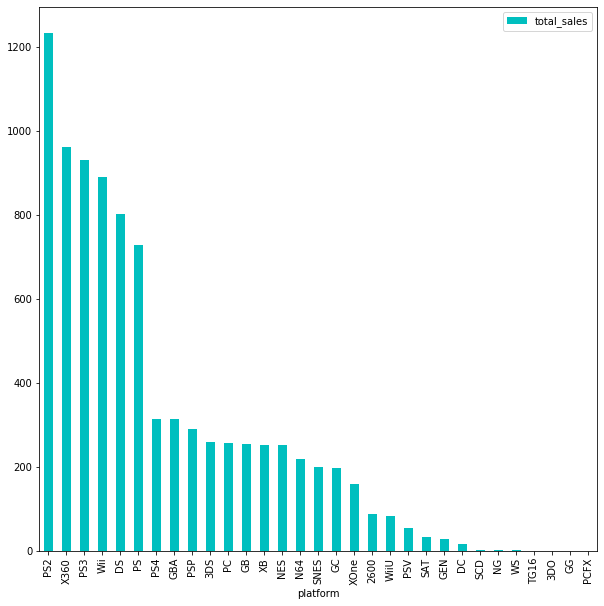

In [26]:
df.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,10), color='c')

Видим, что в графике топ занимает семейство PlayStation.Посмотрим лично на каждые из этих 6 лидеров.

In [27]:
def hist_of_platform(Model, title):
    df[df['platform'] == Model]\
        .groupby('year_of_release')\
        .agg({'total_sales':'sum'})\
        .plot(kind='bar', figsize=(6,8))
    plt.xlabel('Год')
    plt.ylabel('Суммарная выручка (млн.)')
    plt.title(title)
    plt.legend(['Общая выручка'])

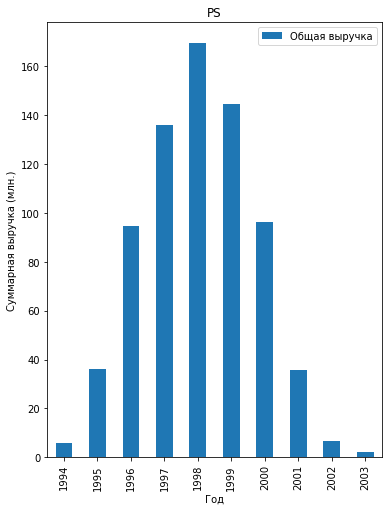

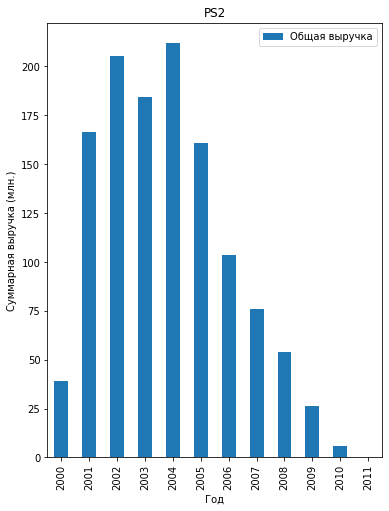

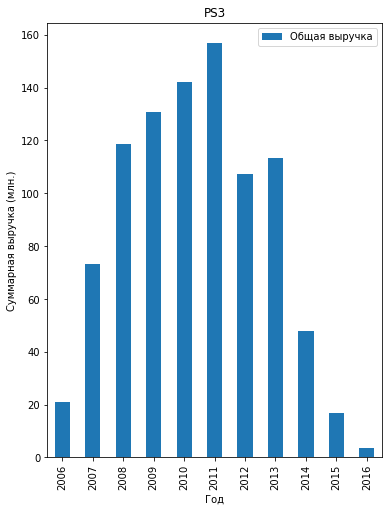

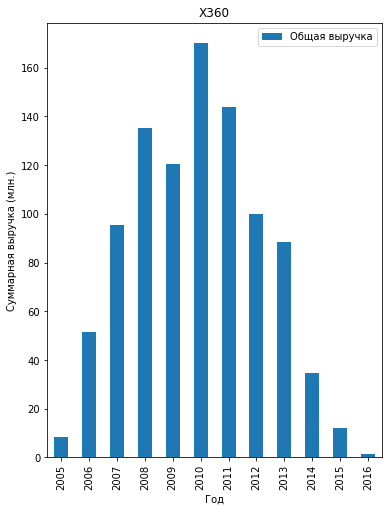

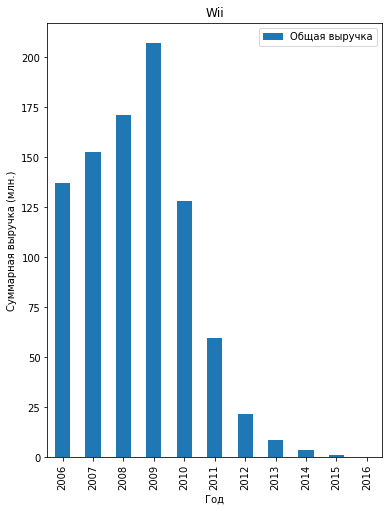

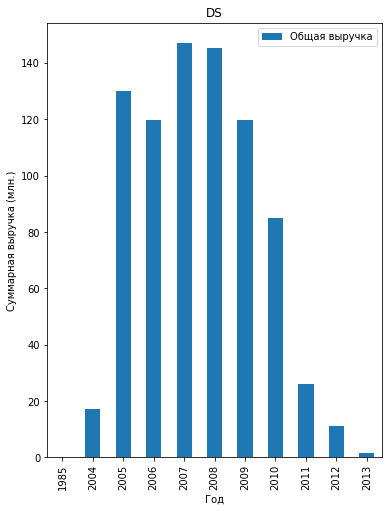

In [28]:
hist_of_platform('PS', 'PS')
hist_of_platform('PS2', 'PS2')
hist_of_platform('PS3', 'PS3')
hist_of_platform('X360', 'X360')
hist_of_platform('Wii', 'Wii')
hist_of_platform('DS', 'DS')

Как видим, что в среднем каждая платформа живёт около 10 лет и пик продаж в среднем приходится на 3-й или 4-й год с момента выпуска консоли. Так же можно обратить внимание, что как только у семейства PS происходит снижение продаж, то на смену приходит следующее поколение консолей. Построим график и посмотрим так ли это, т.к. семейство PS занимает много лидирующих позиций, то построим график роста и спад продаж между поколениями и примерно посмотрим как это работает. Данные помогут нам ориентрироваться за какой период стоит взять актуальные данные и работать с ними.

In [29]:
PS = df[df['platform'] == 'PS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
PS2 = df[df['platform'] == 'PS2']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
PS3 = df[df['platform'] == 'PS3']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
PS4 = df[df['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})

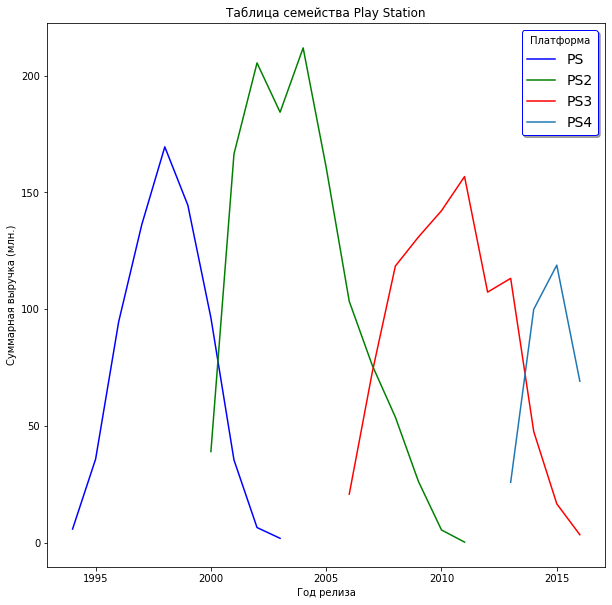

In [30]:
ax = plt.figure( figsize=(10, 10))
plt.plot(PS.year_of_release, PS.total_sales, 'b',
         PS2.year_of_release, PS2.total_sales, 'g',
         PS3.year_of_release, PS3.total_sales, 'r',
         PS4.year_of_release, PS4.total_sales)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства Play Station')
plt.legend(['PS','PS2', 'PS3', 'PS4'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

Теперь посмотрим как обстоят дела у семейства Xbox.

In [31]:
XB = df[df['platform'] == 'XB']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
X360 = df[df['platform'] == 'X360']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
XOne = df[df['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})

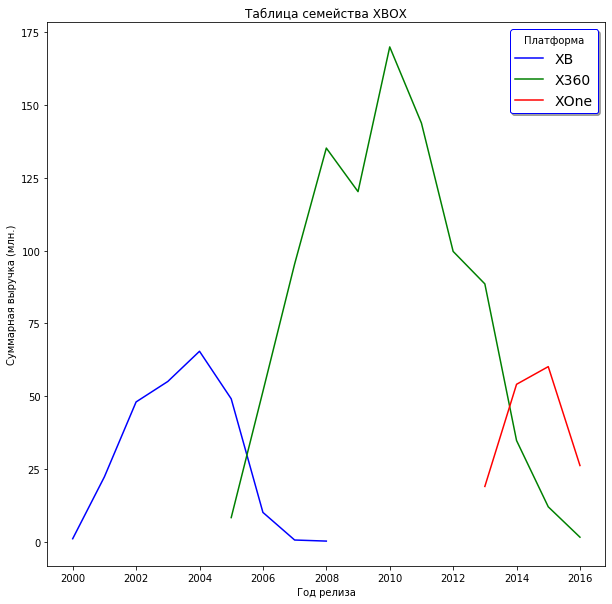

In [32]:
ax = plt.figure( figsize=(10, 10))
plt.plot(XB.year_of_release, XB.total_sales, 'b',
         X360.year_of_release, X360.total_sales, 'g',
         XOne.year_of_release, XOne.total_sales, 'r')
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства XBOX')
plt.legend(['XB','X360', 'XOne'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

Примерно та же закономерность, что у и PS. Так же как можно заметить, что идёт спад продаж на новые поколения. Так же заметим, что как только происходит стабильный спад, то на смену приходит следующее поколение и опять идёт вверх. Так же можно заметить, что предыдущее поколение умирает приблизительно через 4-5 лет после выпуска нового поколения, а пик продаж на новое поколение приходится приблизительно через 4-5 лет после выпуска. А так же, что в среднем поколение живёт около 8-10 лет.
Итак, исходя из данных можно сделать вывод, что:

1. Спад игр пошёл с 2012 года.
2. В среднем платформа живёт 8-10 лет, а пик продаж игр на платформу приходится ~ через 4-5 лет.

Поэтому для того, чтобы объективно составить прогноз на 2017 год, то возьмём данные начиная с 2014 года, как раз когда продажи игр упали, старые поколения популярных платформ начинают умирать, а новые начинают набирать обороты. Хотя судя по графику, не успев выйти, то спустя 2 года продажи игры на эти платформы начинают стабильно падать. 

In [33]:
new_df = df[df['year_of_release'] >= 2014]

Теперь посмотрим на лидеров за наш актуальный период. Построим графики.

In [34]:
new_new = new_df.groupby(['year_of_release', 'platform'], as_index=False)\
    .agg({'total_sales':'sum'})\
    .sort_values(by='year_of_release')

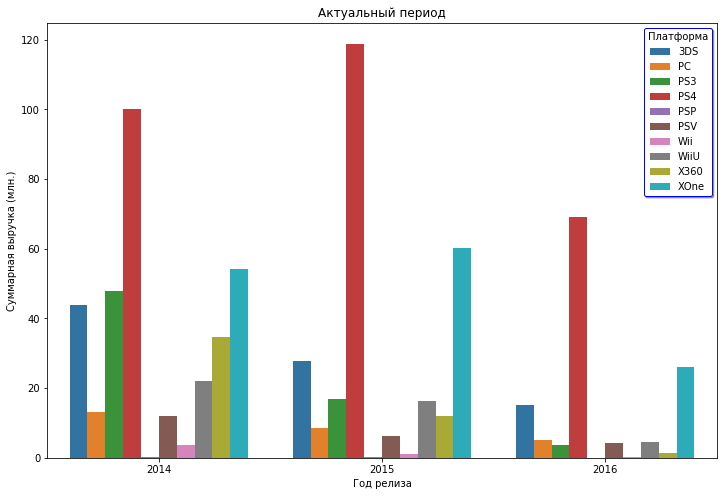

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = "year_of_release", y = "total_sales", hue = "platform", data = new_new)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.legend(fontsize=10, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

(0, 3)

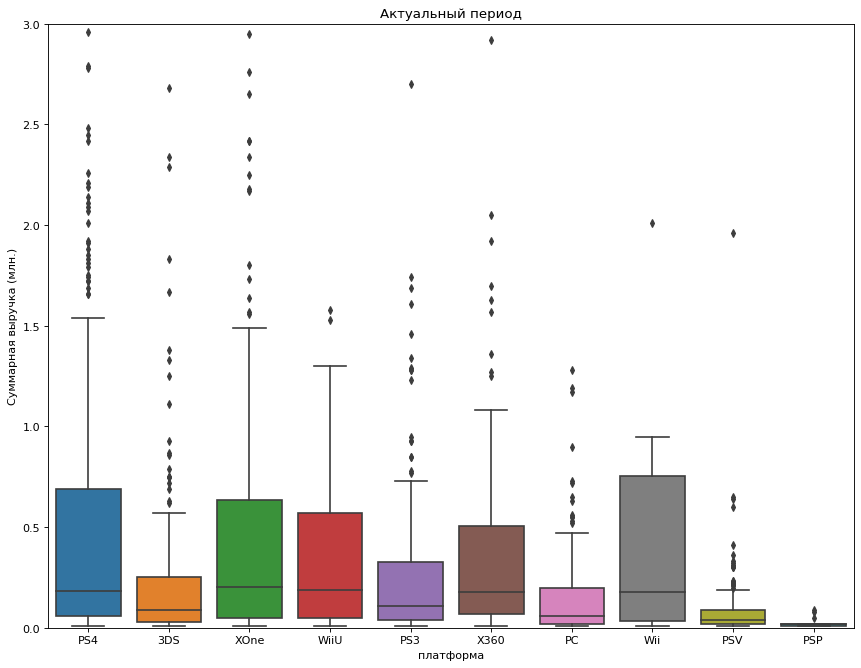

In [36]:
plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='platform', y='total_sales', data=new_df)
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 3])

Как видим, что начиная с 2014 года старые платформы начинают уходить в небытие, а новые поколения встают в лидирующие позциии по продажам игр, но потом идёт общий упадок продаж. Тут можно сразу выделить самого крупного игрока и это PS4. На 2-м месте идёт его конкурент XOne. Так же можно обратить внимание, что есть средние лидеры по продажам.  Туда можно отнести X360, WiiU, Wii. И на самом последнем месте оказались портативные приставки. В целом, ничего удивительного. 

Итак, теперь мы определились с нашим явным лидером и посмотрим есть ли взаимосзязь между отзывами пользователей и критиков и влияет ли это как-то на продажи.

In [37]:
lider_PS = new_df[new_df['platform'] == "PS4"]
lider_PS = lider_PS[lider_PS['user_score'].isnull() == False] 
lider_PS = lider_PS[lider_PS['critic_score'].isnull() == False]
lider_PS = lider_PS[['platform', 'user_score', 'critic_score', 'total_sales']]

Text(0.5, 1, 'Взаимосвязь между общими продажами и оценками')

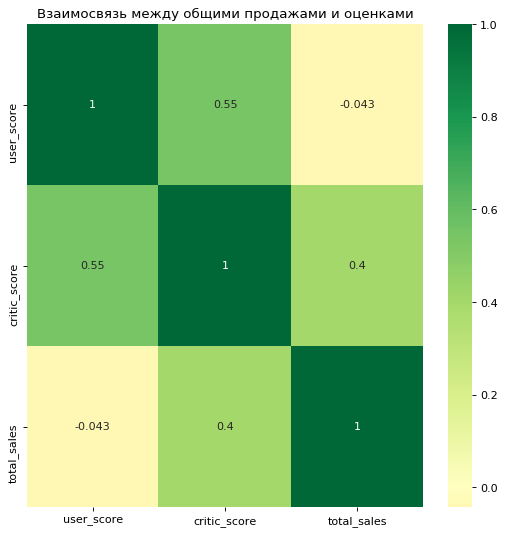

In [38]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(lider_PS.corr(), xticklabels=lider_PS.corr().columns,\
            yticklabels=lider_PS.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')

Итак, как мы видим, что оценки пользователей абсолютно никак не влияют на продажи игр, но в то же время видно, что всё-таки оценки критиков имеют небольшой вес. Теперь посмотрим как обстоят дела с другими платформами.

In [39]:
corr_df = new_df[new_df['platform'] != "PS4"]
corr_df = corr_df[corr_df['user_score'].isnull() == False] 
corr_df = corr_df[corr_df['critic_score'].isnull() == False]
corr_df = corr_df[['platform', 'user_score', 'critic_score', 'total_sales']]

Text(0.5, 1, 'Взаимосвязь между общими продажами и оценками')

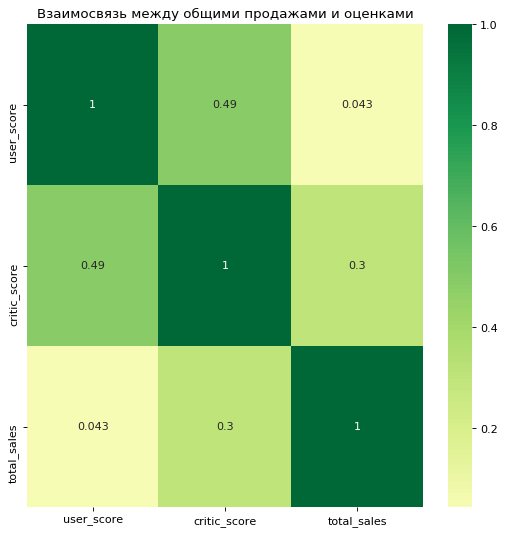

In [40]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(corr_df.corr(), xticklabels=corr_df.corr().columns,\
            yticklabels=corr_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')

Заметим, что ситуация аналогичная. Что оценки пользователей особой роли не играют, но вот оценки критиков всё же имеют как-то вес, что в целом и понятно, если среди аудитории критики заслужили доверия, то и их влияние будет как-то влиять на продажи данных игр, что нельзя сказать про оценки обычных пользователей.

Теперь посмотрим на жанры. 

In [41]:
popular_genre = new_df.groupby('genre', as_index=False)\
    .agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

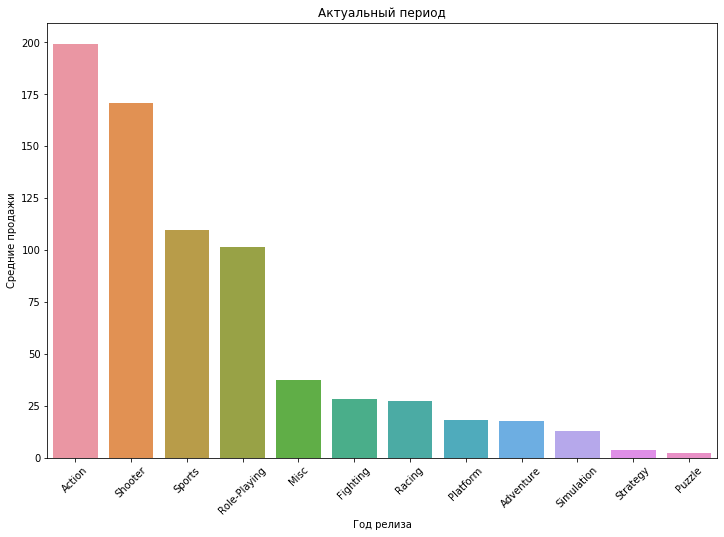

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = 'genre', y = "total_sales", data = popular_genre)
plt.xlabel('Год релиза')
plt.ylabel('Средние продажи')
plt.title('Актуальный период')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

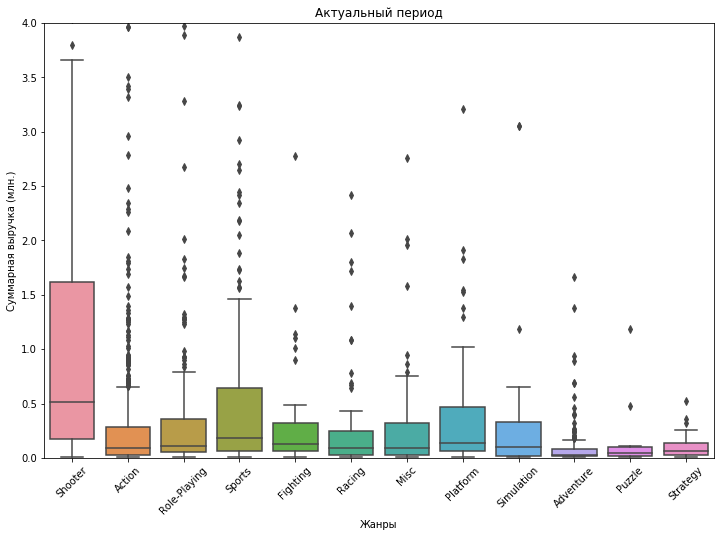

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=new_df)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4])
plt.xticks(rotation=45)

Ага, заметим, что жанр Action самый продаваемый, но при этом жанр Shooter лидирует по средним продажам в сравнении с остальными жанрами, что нельзя сказать про Action. Так же заметим, что интеллектуальные игры и не пользуются большой популярностью. Что средние продажи, что общие продажи находятся в самом низу.

# Вывод по второму шагу. <a name="3.1."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

Итак, после проведения исследовательского анализа можно сделать вывод, что:


1. Больше всего люди покупают игры на консоли семейства Xbox или Playstation. 
2. Игры на ПК особо не берут.
3. Новые поколения пришли на смену старым поколениям.
4. В среднем поколение платформ живёт около 8-10 лет.
5. Пик продаж происходит на 4-5 год поколения.
6. Портативные платформы постепенно вымирают.
7. Оценки пользователей никак не влияют на покупку игр, но вот мнение критиков имеет небольшой вес.
8. Людям неинтересны интеллектуальные игры, большинство людей предпочитает или экшн, или шутер.
9. С 2012 года происходит стабильный спад на спрос к играм даже на новые поколения. 

<strong><font size=3> Приступим к следующему шагу</font></strong><br/>

# Шаг 3. Составим портрет пользователя каждого региона <a name="4."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

Итак, начнём с того, что отберём для каждого региона самые популярные платформы (топ-5).

In [44]:
def top_region(how_group, region, xlabel, title):
    data = new_df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    data['ratio'] = data[region] / data[region].sum()
    print(data.head())
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(ax=ax, x = how_group, y = data['ratio'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Доля рынка')
    plt.title(title)

  platform  na_sales     ratio
3      PS4     98.61  0.347145
9     XOne     81.27  0.286102
8     X360     28.30  0.099627
0      3DS     22.64  0.079701
2      PS3     22.05  0.077624


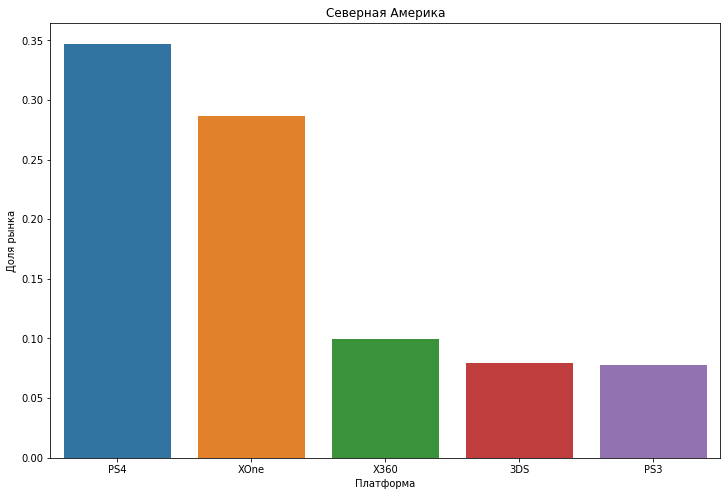

In [45]:
top_region('platform', 'na_sales', 'Платформа', 'Северная Америка')

В Северной Америке преобладает PS4 и практически рядом XBox. Посмотрим теперь, что происходит в Европе.

  platform  eu_sales     ratio
3      PS4    130.04  0.480420
9     XOne     46.25  0.170866
2      PS3     25.54  0.094355
1       PC     17.97  0.066388
0      3DS     16.12  0.059554


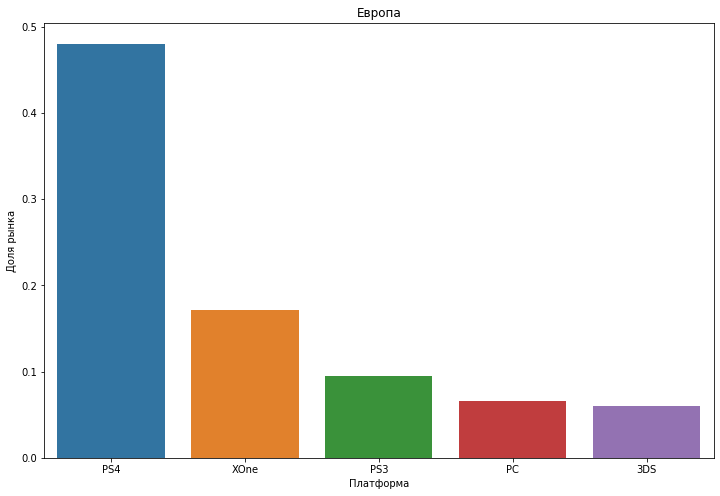

In [46]:
top_region('platform', 'eu_sales', 'Платформа', 'Европа')

А вот в Европе по стравлению с Северной Америкой PS4 куда более популярна нежели Xbox. Да и в целом, прошлое поколение как видим отличается с Северной Америке. Там был Xbox, а тут PS3. Теперь посмотрим, что там в Японии.

  platform  jp_sales     ratio
0      3DS     44.24  0.475239
3      PS4     15.02  0.161349
5      PSV     14.54  0.156193
2      PS3     11.22  0.120529
7     WiiU      7.31  0.078526


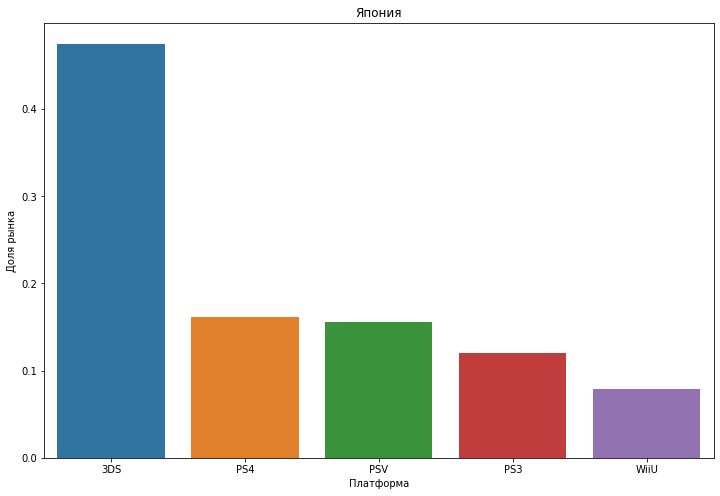

In [47]:
top_region('platform', 'jp_sales', 'Платформа', 'Япония')

Ну в Японии естественно преобладают японские производители, но самый топ занимает портативная приставка от Nintendo. Теперь посмотрим на жанры.

           genre  na_sales     ratio
8        Shooter     79.02  0.278181
0         Action     72.53  0.255333
10        Sports     46.13  0.162395
7   Role-Playing     33.47  0.117827
3           Misc     15.05  0.052982


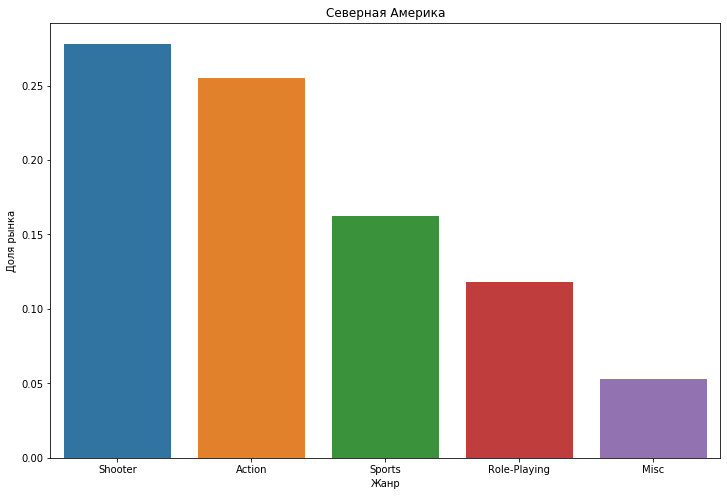

In [48]:
top_region('genre', 'na_sales', 'Жанр', 'Северная Америка')

В Северной Америке преобладает жанр Шутер, а на 2-м месте экшн, а ну а на 3-м спорт. 

           genre  eu_sales     ratio
0         Action     74.68  0.275898
8        Shooter     65.52  0.242057
10        Sports     45.73  0.168945
7   Role-Playing     28.17  0.104071
6         Racing     14.13  0.052202


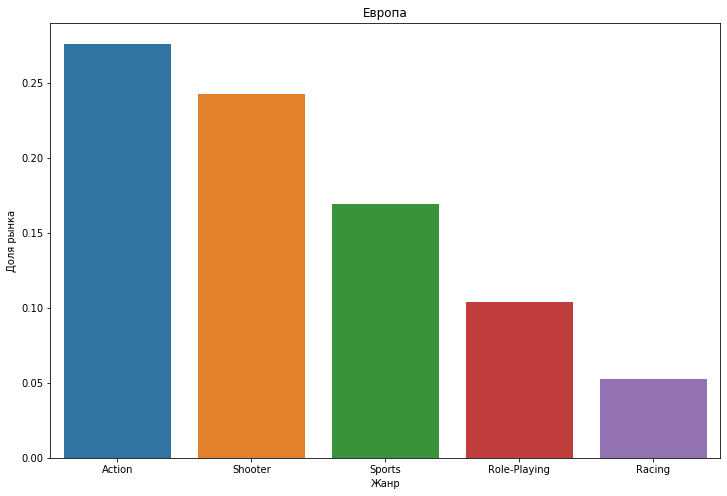

In [49]:
top_region('genre', 'eu_sales', 'Жанр', 'Европа')

В Европе почти то же, что и в Северной Америке, но единственное, что поменялся лидер. В Европе это экшн.

          genre  jp_sales     ratio
7  Role-Playing     31.16  0.334730
0        Action     29.58  0.317757
2      Fighting      6.37  0.068428
3          Misc      5.61  0.060264
8       Shooter      4.87  0.052315


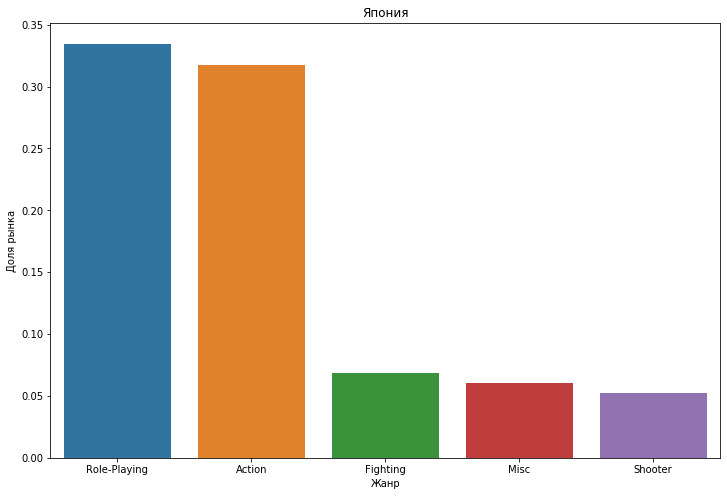

In [50]:
top_region('genre', 'jp_sales', 'Жанр', 'Япония')

Ну а в Японии лидер это игры по ролям *хе-хе*. А на втором месте экшн.

Итак, как мы помним, что в столбце rating лежат оценки согласно организации ESRB:

   * E - для всех возрастов (все)
   * T - для лиц от 13 лет и старше (младший подросток)
   * M - от 17 лет и старше (старший подросток)
   * E10+ - от 10 лет и старше (ребёнок)
   * EC - для всех возрастов (все), тоже самое, что и Е
   * RP - оценка ещё не присвоена
   * K-A - для всех возрастов (все), тоже самое, что и Е
   * AO - для лиц старше 18 лет (взрослый)

Преобразуем их. 

Тогда останется:

   * E - для всех возрастов (все)
   * T - для лиц от 13 лет и старше (младший подросток)
   * M - от 17 лет и старше (старший подросток)
   * E10+ - от 10 лет и старше (ребёнок)
   * RP - оценка ещё не присвоена
   * AO - для лиц старше 18 лет (взрослый)
   
Нулевые значения убирать не будем, т.к. они особо не влияют на наши показатели. Посмотрим как обстоят дела в каждом регионе.

In [51]:
def top_rating(df, how_group, region, title):
    data = df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(ax=ax, x = how_group, y = region, data = data)
    plt.xlabel('Рейтинг')
    plt.ylabel('Суммарная выручка (млн)')
    plt.title(title)

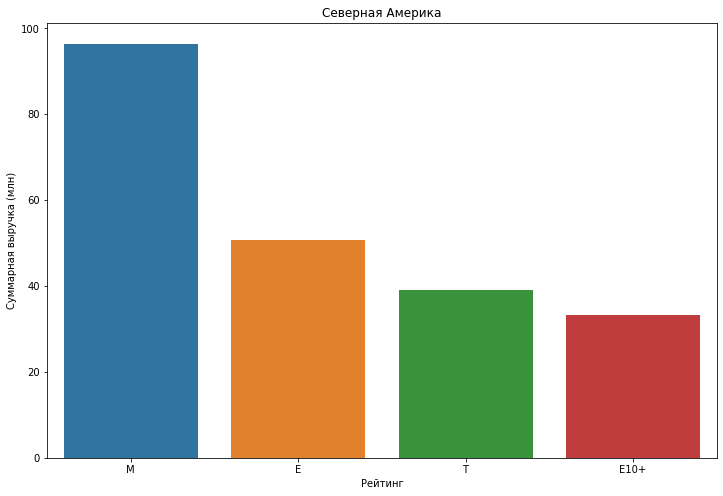

In [52]:
top_rating(new_df, 'rating', 'na_sales', 'Северная Америка')

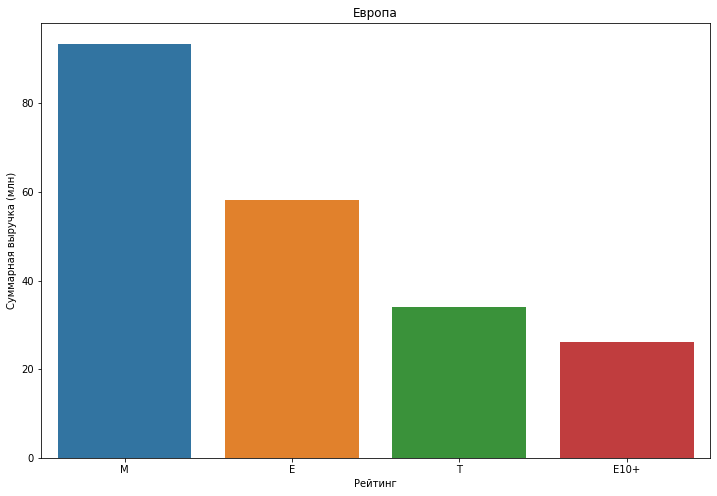

In [53]:
top_rating(new_df, 'rating', 'eu_sales', 'Европа')

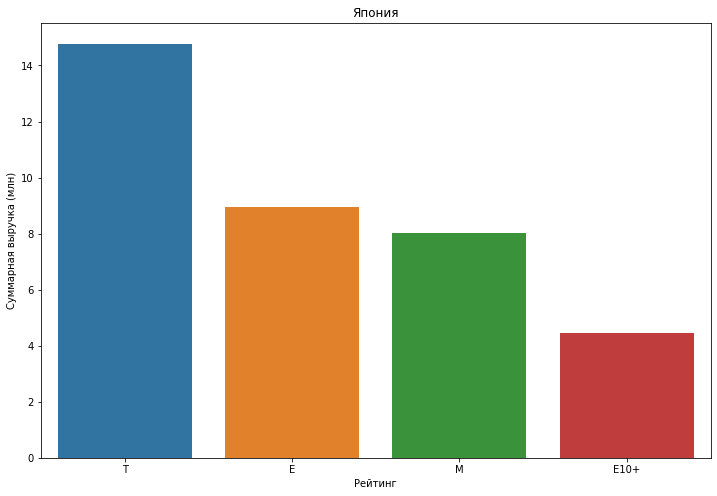

In [54]:
top_rating(new_df, 'rating', 'jp_sales', 'Япония')

Можно сделать вывод, что в Европе и Северной Америке лидируют возрастные категории от 17 лет и игры для всех, а вот в Японии выделяются игры от 13 лет и игры для всех.

# Вывод по третьему шагу. <a name="4.1."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)
 
Итак, после проведения исследовательского анализа можем составить портрет каждого региона:


<strong><font size=3>Япония:</font></strong><br/>

1. Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
2. Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
3. Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.
 

<strong><font size=3>Северная Америка:</font></strong><br/>


1. Самые популярные игровые платформы в Северной Америке (топ-5): PS4, XOne, X360, 3DS, PS3
2. Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
3. Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

<strong><font size=3>Европа:</font></strong><br/>


1. Самые популярные игровые платформы Европе (топ-5): PS4, XOne, PS3, PC, 3DS
2. Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
3. Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.


<strong><font size=3>Приступим к следующему шагу</font></strong><br/>

# Шаг 4. Проверим гипотезы <a name="5."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

У нас есть две гипотезы, которые говорят о том, что:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action  и Sports  разные

Сформулируем первую гипотезу.

(H0) - Нулевая гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

(H1) - Альтернативная гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Итак, подготовим наши датасеты для исследования.

In [55]:
XOne = new_df[new_df['platform'] == 'XOne']
XOne = XOne[XOne['user_score'].isnull() == False] 
PC = new_df[new_df['platform'] == 'PC']
PC = PC[PC['user_score'].isnull() == False]

Теперь посмотрим на наши распределения для того, чтобы правильно провести исследование о равенстве дисперсий по критерию Левене и в дальнейшем провести t - тест, чтобы узнать действительно ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Text(0.5, 1.0, 'Распределение')

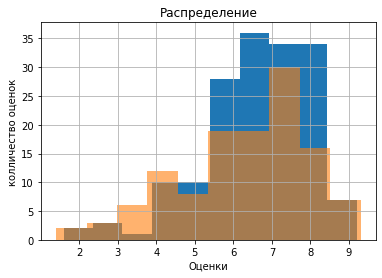

In [56]:
XOne.user_score.hist()
PC.user_score.hist(alpha=0.6)
plt.xlabel('Оценки')
plt.ylabel('колличество оценок')
plt.title('Распределение')

Распределение ненормальное.

In [57]:
st.levene(XOne.user_score, PC.user_score, center ='median')

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

Видим, что pvalue меньше 0.05, что говорит нам о том, что отличие значимое. 

Проведём t- test

In [58]:
def t_test(first_df, second_df, alpha, equal_var):
    alpha = alpha
    results = st.ttest_ind(first_df, second_df, equal_var = equal_var)
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else: 
        print("Не получилось отвергнуть нулевую гипотезу")

In [59]:
t_test(XOne.user_score, PC.user_score, 0.05, False)

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Как видим, что t - тест нам показал, что мы не можем отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так же попробуем провести bootstrap - метод, основанный на многократной генерации выборок методом Монте-Карло среди известных нам выборок. Условно говоря, мы представляем, что наша выборка - это генеральная совокупность и мы извлекаем из неё многократно выборки и сравниваем различие средних между собой. 

In [60]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = st.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = st.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

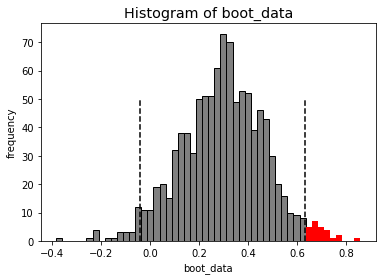

{'boot_data': [0.3115151515151515,
  0.07818181818181817,
  0.14969696969696966,
  0.18060606060606058,
  0.3860606060606061,
  0.46545454545454545,
  0.3175757575757575,
  0.3454545454545455,
  0.22303030303030302,
  0.1648484848484849,
  0.2054545454545454,
  0.4703030303030303,
  0.4090909090909091,
  -0.005454545454545467,
  0.316969696969697,
  0.16000000000000003,
  0.30969696969696964,
  0.45878787878787874,
  0.4448484848484847,
  0.16060606060606064,
  0.4690909090909091,
  0.3248484848484848,
  0.4884848484848485,
  0.3072727272727273,
  0.29878787878787877,
  0.5381818181818182,
  0.42181818181818187,
  0.2866666666666666,
  0.23212121212121206,
  0.16363636363636364,
  0.6266666666666666,
  0.7060606060606062,
  0.6006060606060606,
  0.43151515151515146,
  0.3551515151515152,
  0.3533333333333333,
  0.42666666666666664,
  0.48909090909090913,
  0.14969696969696966,
  0.18242424242424246,
  0.2690909090909091,
  -0.018787878787878808,
  0.21939393939393936,
  -0.085454545454

In [61]:
get_bootstrap(XOne.user_score, PC.user_score, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95)

По гистограмме можно увидеть, что различия незначимы. Так же видим, что в доверительном интервале есть 0 и следовательно что у нас есть вероятность получить получить одинаковые средние рейнтинги по двум жанрам, что говорит нам о том, что у нас не получится отвергнуть нулевую гипотезу и принять альтернативную.

Перейдём ко второй гипотезе и посмотрим различаются ли средние пользовательские рейтинги жанров Action и Sports. Сформулируем гипотезы.


(H0) - Нулевая гипотеза говорит нам о том, что средние пользовательские рейтинги жанров Action и Sports равны.

(H1) - Альтернативная гипотеза говорит нам о том, средние пользовательские рейтинги жанров Action и Sports различаются.

Подготовим данные для исследования.

In [62]:
Action = new_df[new_df['genre'] == 'Action']
Action = XOne[XOne['user_score'].isnull() == False] 
Sports = new_df[new_df['genre'] == 'Sports']
Sports = PC[PC['user_score'].isnull() == False]

Посмотрим на распределения

Text(0.5, 1.0, 'Распределение')

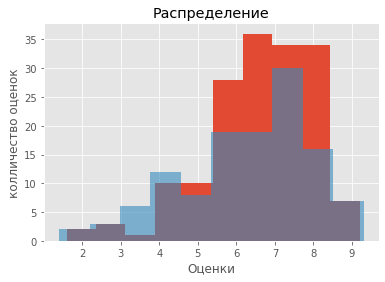

In [63]:
Action.user_score.hist()
Sports.user_score.hist(alpha=0.6)
plt.xlabel('Оценки')
plt.ylabel('колличество оценок')
plt.title('Распределение')

проведём тест Левене.

In [64]:
st.levene(Action.user_score, Sports.user_score, center ='median')

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

Отличие дисперсий значимое. Проведём t - test.

In [65]:
t_test(Action.user_score, Sports.user_score, 0.05, False)

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Как видим, что t - test показал нам, что различия значимы и мы можем принять альтернативную гипотезу о том, что  средние пользовательские рейтинги жанров Action и Sports различаются. Проведём ещё один тест

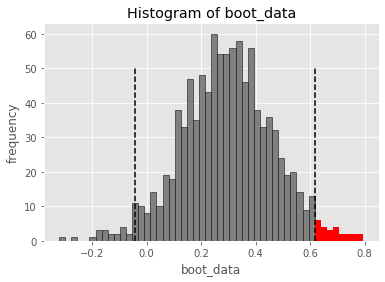

{'boot_data': [0.48121212121212115,
  0.2539393939393939,
  0.31878787878787873,
  0.4254545454545455,
  0.7563636363636365,
  0.37515151515151507,
  0.2666666666666666,
  0.6127272727272726,
  0.32242424242424245,
  0.37878787878787873,
  0.043030303030302995,
  0.5557575757575759,
  0.34545454545454546,
  0.4454545454545454,
  0.14909090909090902,
  0.2527272727272727,
  0.2533333333333333,
  0.35151515151515145,
  0.3103030303030303,
  0.5024242424242424,
  0.23636363636363636,
  0.3490909090909091,
  0.42727272727272725,
  0.6042424242424241,
  0.05939393939393939,
  0.39454545454545453,
  0.35151515151515145,
  0.10666666666666663,
  0.6836363636363636,
  0.45939393939393935,
  0.3981818181818182,
  0.45575757575757586,
  0.49151515151515146,
  0.23939393939393935,
  0.21454545454545457,
  0.606060606060606,
  0.5496969696969698,
  0.2624242424242424,
  0.45272727272727276,
  0.42242424242424237,
  0.4624242424242425,
  0.5272727272727272,
  0.6775757575757575,
  0.312727272727272

In [66]:
get_bootstrap(Action.user_score, Sports.user_score, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95)

По гистограмме можно увидеть, что различия значимы. Так же видим, что в доверительном интервале нет 0 и следовательно что у нас нет вероятности получить получить одинаковые средние рейнтинги по двум жанрам, что говорит нам о том, что у нас получится отвергнуть нулевую гипотезу и принять альтернативную.

# Вывод по четвертому шагу. <a name="5.1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Итак, после проведения статистического анализа можем заключить, что:

* Средние пользовательские рейтинги платформ Xbox one и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные



<strong><font size=3>Приступим к последнему шагу</font></strong><br/>


# Шаг 5. Общий вывод. <a name="6."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

Подведём итоги проделанной нами работой и сделаем вывод, что:

1. Объём рынка по продажам игр упал в 2012 году и стабильно держится.
2. Портативные приставки теряют свою популярность.
3. Больше всего люди покупают игры на консоли семейства Xbox или Playstation.
4. Игры на ПК особо не берут.
5. В среднем поколение платформ живёт около 8-10 лет.
6. Пик продаж происходит на 4-5 год поколения.
7. Оценки пользователей никак не влияют на покупку игр, но вот мнение критиков имеет небольшой вес.
8. Людям неинтересны интеллектуальные игры, большинство людей предпочитает или экшн, или шутер.
9. Если ориентироваться на рынок Японии, то: 

     * Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
     * Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
     * Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.
     

10. Если ориентироваться на рынок Северной Америки:

     * Самые популярные игровые платформы в Северной Америке (топ-5): PS4, XOne, X360, 3DS, PS3
     * Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
     * Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.
     

11. Если ориентироваться на рынок Европы, то:

    * Самые популярные игровые платформы Европе (топ-5): PS4, XOne, PS3, PC, 3DS
    * Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
    * Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

# Рекомендации <a name="6.1."></a><br/>

[<font size="2">(к содержанию)</font>](#to_content.)

Основную долю закупа что провести для таких приставок как Sony Playstation 4, небольшую часть на Xbox.
Среди жанров сделать акцент на Action и Shooter и выбирать игры с рейтингом от 17 и старше.
Увеличить продажи по остаткам игр на портативные приставки, т.к. в скором времени они уйдут с мирового рынка и останутся популярны локально. 
На сайте (если таковой имеется) добавить раздел с оценочным мнением критиков. 